<hr><font color="green"><h1>: 8.Feature_Scaling</h1></font>

In [659]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [661]:
df = pd.read_csv('data/Social_Network_Ads.csv')

In [663]:
df = df.iloc[:,2:]

In [665]:
df.sample(5)

,Age,EstimatedSalary,Purchased
324,48,131000,1
212,59,42000,0
219,59,143000,1
293,37,77000,0
180,26,16000,0


In [667]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(df.drop('Purchased',axis=1),
                                                 df['Purchased'],test_size=0.3,
                                                 random_state=0)
X_train.shape,X_test.shape

((280, 2), (120, 2))

Standard Scaler

In [670]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

#fit the scaler to the train set,it will learn the parameters
scaler.fit(X_train)

#transform train and test sets
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [672]:
scaler.mean_

array([3.78642857e+01, 6.98071429e+04])

In [674]:
 X_train_scaled = pd.DataFrame(X_train_scaled,columns = X_train.columns)
 X_test_scaled = pd.DataFrame(X_test_scaled,columns = X_test.columns)

In [676]:
X_train_scaled

,Age,EstimatedSalary
0,-1.163172,-1.584970
1,2.170181,0.930987
2,0.013305,1.220177
3,0.209385,1.075582
4,0.405465,-0.486047
...,...,...
275,0.993704,-1.151185
276,-0.869053,-0.775237
277,-0.182774,-0.514966
278,-1.065133,-0.457127


In [678]:
np.round(X_train.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,37.9,69807.1
std,10.2,34641.2
min,18.0,15000.0
25%,30.0,43000.0
50%,37.0,70500.0
75%,46.0,88000.0
max,60.0,150000.0


In [680]:
np.round(X_train_scaled.describe(),1)

,Age,EstimatedSalary
count,280.0,280.0
mean,0.0,0.0
std,1.0,1.0
min,-1.9,-1.6
25%,-0.8,-0.8
50%,-0.1,0.0
75%,0.8,0.5
max,2.2,2.3


Effect of Scaling


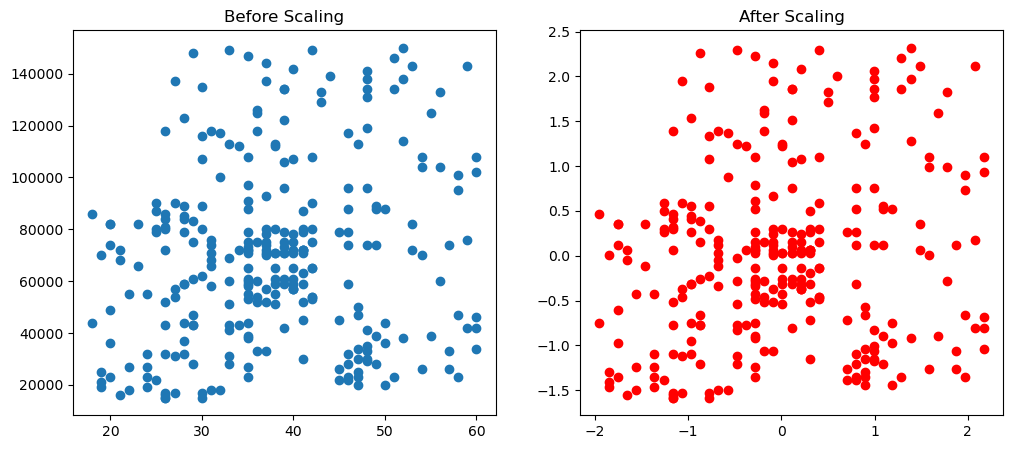

In [683]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize = (12,5))

ax1.scatter(X_train['Age'],X_train['EstimatedSalary'])
ax1.set_title("Before Scaling")
ax2.scatter(X_train_scaled['Age'],X_train_scaled['EstimatedSalary'],color='red')
ax2.set_title("After Scaling")
plt.show()


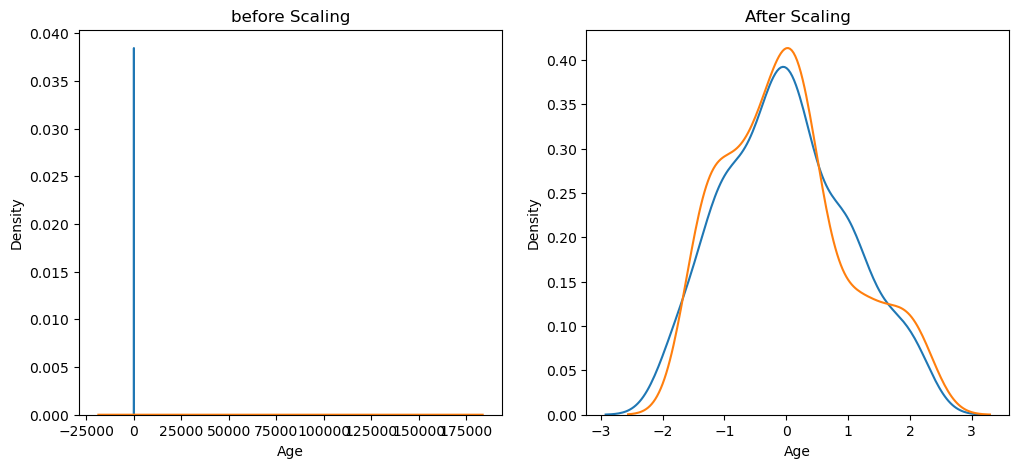

In [685]:
fig, (ax1,ax2) = plt.subplots(ncols = 2,figsize=(12,5))

#before scaling
ax1.set_title("before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)
sns.kdeplot(X_train['EstimatedSalary'],ax=ax1)

#After Scaling
ax2.set_title("After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
sns.kdeplot(X_train_scaled['EstimatedSalary'],ax=ax2)
plt.show()

Comparisions of Distributions

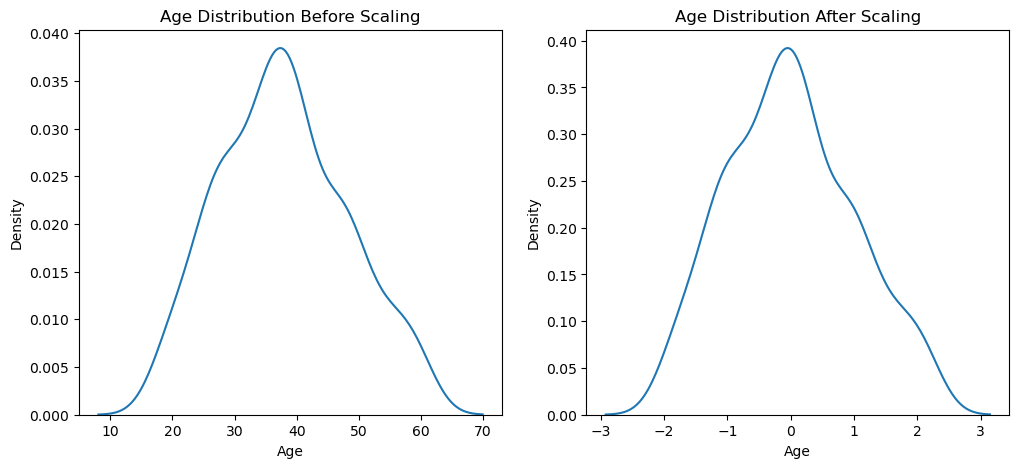

In [688]:
fig, (ax1,ax2) = plt.subplots(ncols=2, figsize=(12,5))

#before scaling
ax1.set_title("Age Distribution Before Scaling")
sns.kdeplot(X_train['Age'],ax=ax1)

#after scaling
ax2.set_title("Age Distribution After Scaling")
sns.kdeplot(X_train_scaled['Age'],ax=ax2)
plt.show()

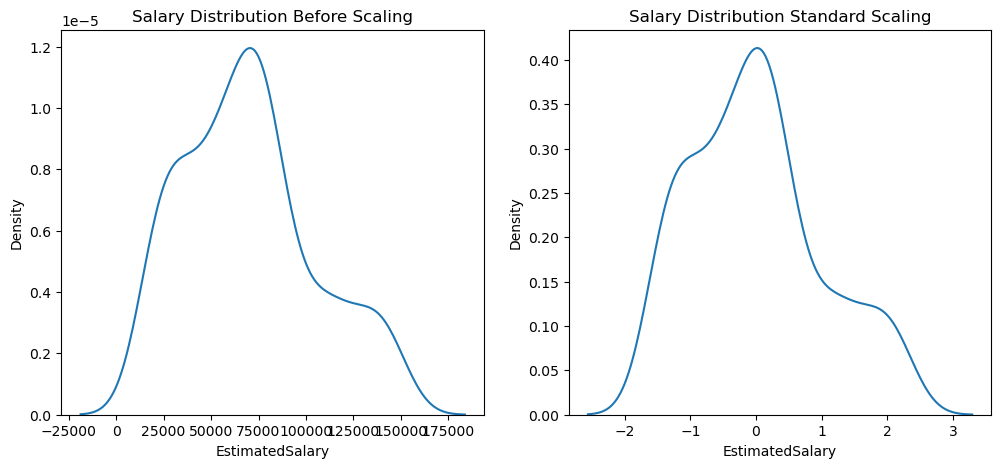

In [690]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Salary Distribution Before Scaling')
sns.kdeplot(X_train['EstimatedSalary'], ax=ax1)

# after scaling
ax2.set_title('Salary Distribution Standard Scaling')
sns.kdeplot(X_train_scaled['EstimatedSalary'], ax=ax2)
plt.show()

Why Scaling is important?


Applying scaling on Logistic Regression

In [694]:
from sklearn.linear_model import LogisticRegression

In [696]:
lr = LogisticRegression()
lr_scaled = LogisticRegression()

In [698]:
lr.fit(X_train,y_train)
lr_scaled.fit(X_train_scaled,y_train)


LogisticRegression()

In [700]:
y_pred = lr.predict(X_test)
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [702]:
from sklearn.metrics import accuracy_score

In [704]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.875
Scaled 0.8666666666666667


Here we can clearly see that after applying scaling our accuracy score is increased than actual accuracy score.

Applying scaling on Decision Tree Classifier

In [708]:
from sklearn.tree import DecisionTreeClassifier

In [710]:
dt = DecisionTreeClassifier()
dt_scaled = DecisionTreeClassifier()

In [712]:
dt.fit(X_train,y_train)
dt_scaled.fit(X_train_scaled,y_train)

DecisionTreeClassifier()

In [714]:
y_pred = dt.predict(X_test)
y_pred_scaled = dt_scaled.predict(X_test_scaled)

In [716]:
print("Actual",accuracy_score(y_test,y_pred))
print("Scaled",accuracy_score(y_test,y_pred_scaled))

Actual 0.8666666666666667
Scaled 0.875


Here we can see that applying scaling on DecisionTreeClassifier doesn't effect actual and scaled accuracy score.